# Comparing 1 month old and 7 year old sets of Ditting burrs

## Background
I currently have a Baratza Forte BG with 7 year old 54mm Ditting steel burrs and a Vario with the same burr set but only a month old. The Vario has the "alicorn" upgrades and both grinders are aligned (using a marker test). So they are essentially the same grinder and same burrs with the only difference being the age of the burrs. 

The big difference that I noticed between the two burr sets was that the older burrs required a much finer grind setting compared to the newer burrs. And this effect remained the same if I switched the burrs between the two grinders. The only way I could explain this difference was that
- the older burrs are fully seasoned and so produce less fines and hence need a finer average grind size or
- the older burrs are worn down and so require a finer grind setting to get the same grind size.

With this experiment, I'm trying to see which of these hypotheses makes more sense.

## Experiment design
With the new burrs, I set the grind size to "2O" which was 11 micro steps above touch. I dialed in the older burr set to get the same shot time which happened to be at burr touch. All shots in this experiment are using a Breville Dual Boiler (BDB) with the flow control mod and with the needle valve set to a 5ml/s water debit and remaining constant thoughout the shot. The target shot yield was 54g. Water temperature was set to 96°C and the coffee used was a light roasted natural Ethiopia Yirgacheffe from S&W Roasting.

For each shot, I measured the TDS using a brix meter (multiplying by 0.85 to get the TDS). This is not highly accurate, but is the only option I currently have to measure extraction yield. The brix meter was zeroed out using the water recipe (RPavlis, 0.75 mMolar KHCO3) used for the shots. All measurements were made by first stirring the shot and transferring ~1ml into a cool ceramic cup and swirling it so the sample cools fast with as little evaporation as possible. Measurements were taken once the sample was at room temperature.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

df = pd.read_json('vario_burr_seasoning.json')

### Compute the ratio for each shot

In [2]:
df['ratio'] = df['brew_beverage_quantity'] / df['grind_weight']

### Compute the extraaction yield for each shot

In [3]:
df['extraction_yield'] = df['ratio'] * df['tds']

In [4]:
old_burrs = df[df['mill'] == 'old']
old_burrs_0 = old_burrs[old_burrs['grind_size'] == '0']

In [5]:
new_burrs = df[df['mill'] == 'new']

### Shots using the old burrs at touch point

In [6]:
old_burrs_0

,grind_size,grind_weight,mill,brew_temperature,brew_time,tds,brew_beverage_quantity,ratio,extraction_yield
1,0,17.1,old,96,26,7.225,54.3,3.175439,22.942544
3,0,17.1,old,96,23,6.970,54.7,3.198830,22.295848
5,0,17.1,old,96,22,6.885,54.3,3.175439,21.862895
7,0,17.1,old,96,21,6.460,57.2,3.345029,21.608889


### Shots using the new burrs at setting "2O" (+8 from touch)

In [7]:
new_burrs

,grind_size,grind_weight,mill,brew_temperature,brew_time,tds,brew_beverage_quantity,ratio,extraction_yield
2,2O,17.1,new,96,27,6.800,57.1,3.339181,22.706433
4,2O,17.1,new,96,27,7.140,54.2,3.169591,22.630877
6,2O,17.1,new,96,24,6.800,54.3,3.175439,21.592982
8,2O,17.1,new,96,26,6.885,54.0,3.157895,21.742105


## Shot time

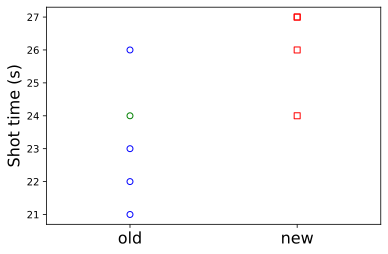

In [8]:
plt.plot(np.zeros_like(old_burrs_0['mill']), old_burrs_0['brew_time'], 'ob', markerfacecolor='none')
plt.plot(0, df.iloc[9]['brew_time'], 'og', markerfacecolor='none')
plt.plot(np.ones_like(new_burrs['mill']), new_burrs['brew_time'], 'sr', markerfacecolor='none')
plt.xticks([0, 1], ['old', 'new'], fontsize='16')
plt.xlim(-0.5,1.5)
plt.ylabel('Shot time (s)', fontsize=16)
plt.show()

## Extraction yield

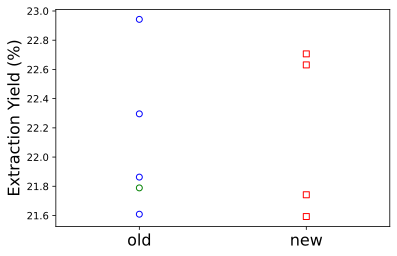

In [9]:
plt.plot(np.zeros_like(old_burrs_0['mill']), old_burrs_0['extraction_yield'], 'ob', markerfacecolor='none')
plt.plot(0, df.iloc[9]['extraction_yield'], 'og', markerfacecolor='none')
plt.plot(np.ones_like(new_burrs['mill']), new_burrs['extraction_yield'], 'sr', markerfacecolor='none')
plt.xticks([0, 1], ['old', 'new'], fontsize='16')
plt.xlim(-0.5,1.5)
plt.ylabel('Extraction Yield (%)', fontsize=16)
plt.show()

## Extraction yield vs Shot time

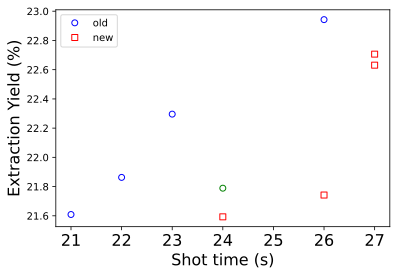

In [10]:
plt.plot(old_burrs_0['brew_time'], old_burrs_0['extraction_yield'], 'ob', markerfacecolor='none', label='old')
plt.plot(df.iloc[9]['brew_time'], df.iloc[9]['extraction_yield'], 'og', markerfacecolor='none')
plt.plot(new_burrs['brew_time'], new_burrs['extraction_yield'], 'sr', markerfacecolor='none', label='new')
plt.xticks(fontsize='16')
plt.xlabel('Shot time (s)', fontsize=16)
plt.ylabel('Extraction Yield (%)', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# Conclusion

I don't have a concrete conclusion yet. There doesn't seem to be a statistically significant difference between old and new burrs at least based on extraction. Shots from the older burrs kept becoming faster each time which might indicate a drift in the grind size even without an explicit grind setting change. The only clear difference seems to be in the EY vs time plot with the older burrs getting a higher extraction yield at the same shot time.